In [1]:
#data analysis
import pandas as pd
import numpy as np
import random as rnd
#data visualisation
import seaborn as sns
import matplotlib.pyplot as plt

#machine linearing
from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble.forest import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier


Bad key "text.kerning_factor" on line 4 in
C:\Users\MAC\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution
C:\Users\MAC\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.ensemble.forest module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
import sklearn
print(sklearn.__version__)

0.23.1


In [3]:
#retriveing data and combining them
train_df=pd.read_csv("C:\\Users\\MAC\\Desktop\\titanic\\train.csv")
test_df = pd.read_csv("C:\\Users\\MAC\\Desktop\\titanic\\test.csv")
combine=[train_df,test_df]                     

In [4]:
combine


[     PassengerId  Survived  Pclass  \
 0              1         0       3   
 1              2         1       1   
 2              3         1       3   
 3              4         1       1   
 4              5         0       3   
 ..           ...       ...     ...   
 886          887         0       2   
 887          888         1       1   
 888          889         0       3   
 889          890         1       1   
 890          891         0       3   
 
                                                   Name     Sex   Age  SibSp  \
 0                              Braund, Mr. Owen Harris    male  22.0      1   
 1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
 2                               Heikkinen, Miss. Laina  female  26.0      0   
 3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
 4                             Allen, Mr. William Henry    male  35.0      0   
 ..                                               

In [5]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [6]:
test_df


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [7]:
#number of features check
print(train_df.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [8]:
t=train_df[["Survived","Sex","Embarked","Pclass"]].head(10)


In [9]:
type(t)

pandas.core.frame.DataFrame

In [10]:
t

,Survived,Sex,Embarked,Pclass
0,0,male,S,3
1,1,female,C,1
2,1,female,S,3
3,1,female,S,1
4,0,male,S,3
5,0,male,Q,3
6,0,male,S,1
7,0,male,S,3
8,1,female,S,3
9,1,female,C,2


In [11]:
n=train_df[["Age","Fare","SibSp","Parch"]]

In [12]:
n.head(10)

,Age,Fare,SibSp,Parch
0,22.0,7.2500,1,0
1,38.0,71.2833,1,0
2,26.0,7.9250,0,0
3,35.0,53.1000,1,0
4,35.0,8.0500,0,0
5,NaN,8.4583,0,0
6,54.0,51.8625,0,0
7,2.0,21.0750,3,1
8,27.0,11.1333,0,2
9,14.0,30.0708,1,0


In [13]:
train_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [14]:
train_df.tail(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
881,882,0,3,"Markun, Mr. Johann",male,33.0,0,0,349257,7.8958,NaN,S
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.7500,NaN,Q


In [15]:
train_df.isnull().tail(50)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
841,False,False,False,False,False,False,False,False,False,False,True,False
842,False,False,False,False,False,False,False,False,False,False,True,False
843,False,False,False,False,False,False,False,False,False,False,True,False
844,False,False,False,False,False,False,False,False,False,False,True,False
845,False,False,False,False,False,False,False,False,False,False,True,False
846,False,False,False,False,False,True,False,False,False,False,True,False
847,False,False,False,False,False,False,False,False,False,False,True,False
848,False,False,False,False,False,False,False,False,False,False,True,False
849,False,False,False,False,False,True,False,False,False,False,False,False
850,False,False,False,False,False,False,False,False,False,False,True,False


In [16]:
test_df.isnull()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
413,False,False,False,False,True,False,False,False,False,True,False
414,False,False,False,False,False,False,False,False,False,False,False
415,False,False,False,False,False,False,False,False,False,True,False
416,False,False,False,False,True,False,False,False,False,True,False


In [17]:
train_df.info()
print("_"*40)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passenger

In [18]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [19]:
#include=['object','float','int']
#perc=[0.20,0.40,0.60,0.80]
train_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Beane, Mrs. Edward (Ethel Clarke)",male,1601,B96 B98,S
freq,1,577,7,4,644


In [20]:
#co-relating pclass, sex ,parch, and sibsp with survived
train_df[['Pclass','Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [21]:
train_df[['Sex','Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [22]:
train_df[['SibSp','Survived']].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [23]:
train_df[['Parch','Survived']].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


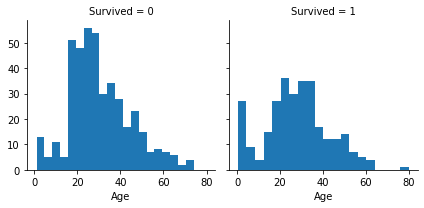

In [24]:
#analysis using visuals
g=sns.FacetGrid(train_df,col='Survived')
g.map(plt.hist,'Age', bins=20)

C:\Users\MAC\anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


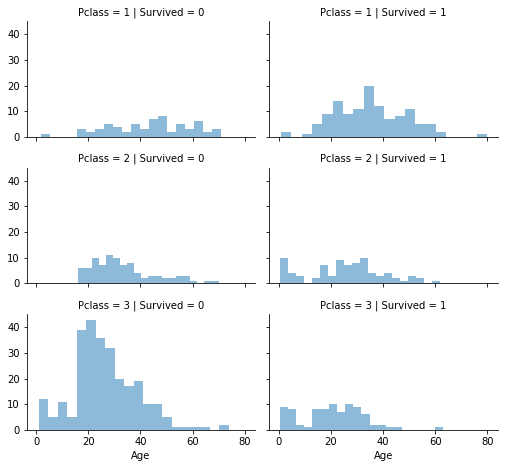

In [25]:
grid=sns.FacetGrid(train_df,col='Survived', row='Pclass',size=2.2, aspect=1.6)
grid.map(plt.hist,'Age', alpha=.5,bins=20)
grid.add_legend();

C:\Users\MAC\anaconda3\lib\site-packages\seaborn\axisgrid.py:723: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\MAC\anaconda3\lib\site-packages\seaborn\axisgrid.py:728: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


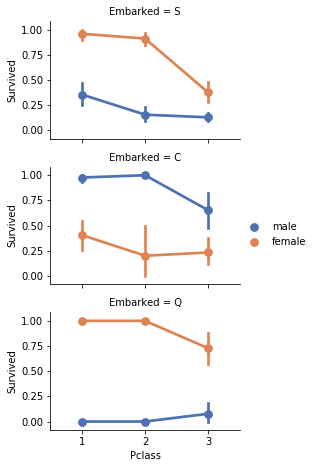

In [26]:
grid=sns.FacetGrid(train_df,row='Embarked', size=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass','Survived','Sex', palette='deep')
grid.add_legend()

C:\Users\MAC\anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\MAC\anaconda3\lib\site-packages\seaborn\axisgrid.py:723: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


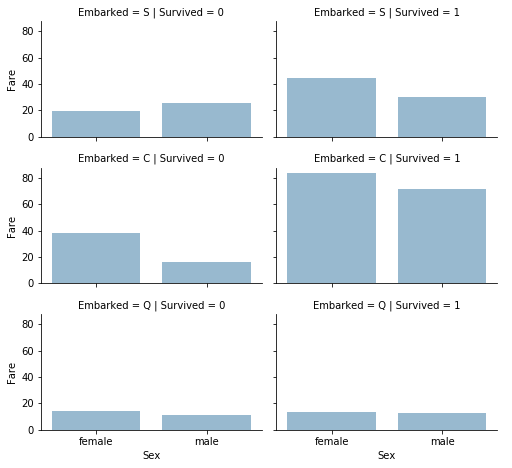

In [27]:
grid=sns.FacetGrid(train_df,row='Embarked',col='Survived',size=2.2,aspect=1.6)
grid.map(sns.barplot,'Sex','Fare', alpha=.5,ci=None)
grid.add_legend()

In [28]:
#wrangle data: changes features
print('before',train_df.shape,test_df.shape,combine[0].shape,combine[1].shape)

test_df

before (891, 12) (418, 11) (891, 12) (418, 11)


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [29]:
train_df=train_df.drop(['Ticket' , 'Cabin'],axis=1)
test_df=test_df.drop(['Ticket' , 'Cabin'],axis=1)
combine=[train_df,test_df]
print("after",train_df.shape,test_df.shape,combine[0].shape,combine[1].shape)

after (891, 10) (418, 9) (891, 10) (418, 9)


In [30]:
for dataset in combine:
    dataset['Title']=dataset.Name.str.extract(' ([A-Za-z]+)\.',expand=False)
    
pd.crosstab(train_df['Title'],train_df['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [31]:
for dataset in combine:
    dataset['Title']=dataset['Title'].replace(['Lady','Countess','Capt','Col','Don','Dr','Major','Rev','Sir','Jonkheer','Dona'],'Rare')
    dataset['Title']=dataset['Title'].replace('Mlle','Miss')
    dataset['Title']=dataset['Title'].replace('Ms','Miss')
    dataset['Title']=dataset['Title'].replace('Mme','Mrs')    
train_df[['Title','Survived']].groupby(['Title'], as_index=False).mean() 


,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


In [32]:
#converting categorical feature into ordinal feature
title_mapping={"Mr":1,"Miss":2,"Mrs":3,"Master":4,"Rare":5}
for dataset in combine:
    dataset['Title']=dataset['Title'].map(title_mapping)
    
    
train_df.head(50)    
    

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,8.4583,Q,1
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,51.8625,S,1
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,21.0750,S,4
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,11.1333,S,3
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,30.0708,C,3


In [33]:
#now we can drop name and passengerid feature 
train_df=train_df.drop(['Name','PassengerId'], axis=1)
test_df=test_df.drop(['Name'], axis=1)
combine=[train_df,test_df]
train_df.shape, test_df.shape

((891, 9), (418, 9))

In [34]:
sex_mapping={'female':1,'male':0}
for dataset in combine:
    dataset['Sex']=dataset['Sex'].map(sex_mapping).astype(int)
train_df.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,S,1
1,1,1,1,38.0,1,0,71.2833,C,3
2,1,3,1,26.0,0,0,7.9250,S,2
3,1,1,1,35.0,1,0,53.1000,S,3
4,0,3,0,35.0,0,0,8.0500,S,1
5,0,3,0,NaN,0,0,8.4583,Q,1
6,0,1,0,54.0,0,0,51.8625,S,1
7,0,3,0,2.0,3,1,21.0750,S,4
8,1,3,1,27.0,0,2,11.1333,S,3
9,1,2,1,14.0,1,0,30.0708,C,3


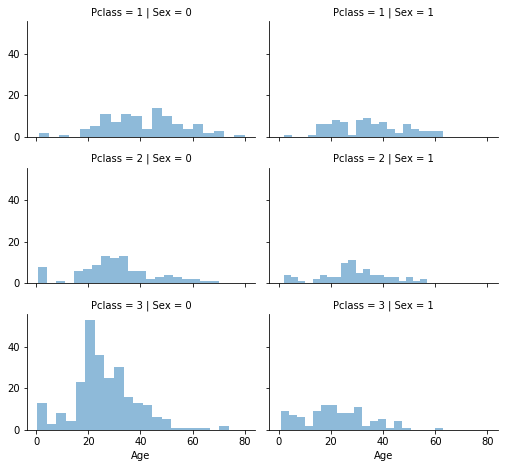

In [35]:
#missing values completion
grid=sns.FacetGrid(train_df,row='Pclass',col='Sex',height=2.2, aspect=1.6)
grid.map(plt.hist,'Age', alpha=0.5, bins=20)
grid.add_legend()

In [36]:
guess_ages=np.zeros((2,3))
guess_ages


array([[0., 0., 0.],
       [0., 0., 0.]])

In [37]:
for dataset in combine:
    for i in range(0,2):
        for j in range(0,3):
            guess_df=dataset[(dataset['Sex']==i) & (dataset['Pclass']==j+1)]['Age'].dropna()
            age_guess=guess_df.median()
            print(age_guess)
            guess_ages[i,j]=int(age_guess/0.5+ 0.5)*0.5
    for i in range(0,2):
        for j in range(0,3):
            dataset.loc[(dataset.Age.isnull())&(dataset['Sex']==i)&(dataset['Pclass']==j+1),'Age']=guess_ages[i,j]
    dataset['Age']=dataset['Age'].astype(int)
train_df.head()    
    
            

40.0
30.0
25.0
35.0
28.0
21.5
42.0
28.0
24.0
41.0
24.0
22.0


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22,1,0,7.2500,S,1
1,1,1,1,38,1,0,71.2833,C,3
2,1,3,1,26,0,0,7.9250,S,2
3,1,1,1,35,1,0,53.1000,S,3
4,0,3,0,35,0,0,8.0500,S,1


In [38]:
train_df['AgeBand']=pd.cut(train_df['Age'],5)
train_df[['AgeBand','Survived']].groupby(['AgeBand'],as_index=False).mean().sort_values('AgeBand',ascending=True)


,AgeBand,Survived
0,"(-0.08, 16.0]",0.550000
1,"(16.0, 32.0]",0.337374
2,"(32.0, 48.0]",0.412037
3,"(48.0, 64.0]",0.434783
4,"(64.0, 80.0]",0.090909


In [39]:
for dataset in combine:
    dataset.loc[dataset['Age']<=16,'Age']=0
    dataset.loc[(dataset['Age']>16)&(dataset['Age']<=32),'Age']=1
    dataset.loc[(dataset['Age']>32)&(dataset['Age']<=48),'Age']=2
    dataset.loc[(dataset['Age']>48)&(dataset['Age']<=64),'Age']=3
    dataset.loc[(dataset['Age']>64)&(dataset['Age']<=80),'Age']=4
train_df.head(10)    
    
    

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeBand
0,0,3,0,1,1,0,7.2500,S,1,"(16.0, 32.0]"
1,1,1,1,2,1,0,71.2833,C,3,"(32.0, 48.0]"
2,1,3,1,1,0,0,7.9250,S,2,"(16.0, 32.0]"
3,1,1,1,2,1,0,53.1000,S,3,"(32.0, 48.0]"
4,0,3,0,2,0,0,8.0500,S,1,"(32.0, 48.0]"
5,0,3,0,1,0,0,8.4583,Q,1,"(16.0, 32.0]"
6,0,1,0,3,0,0,51.8625,S,1,"(48.0, 64.0]"
7,0,3,0,0,3,1,21.0750,S,4,"(-0.08, 16.0]"
8,1,3,1,1,0,2,11.1333,S,3,"(16.0, 32.0]"
9,1,2,1,0,1,0,30.0708,C,3,"(-0.08, 16.0]"


In [40]:

combine=[train_df,test_df]
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeBand
0,0,3,0,1,1,0,7.2500,S,1,"(16.0, 32.0]"
1,1,1,1,2,1,0,71.2833,C,3,"(32.0, 48.0]"
2,1,3,1,1,0,0,7.9250,S,2,"(16.0, 32.0]"
3,1,1,1,2,1,0,53.1000,S,3,"(32.0, 48.0]"
4,0,3,0,2,0,0,8.0500,S,1,"(32.0, 48.0]"


In [41]:
for dataset in combine:
    dataset['Familysize']=dataset['SibSp']+dataset['Parch']+1
train_df[['Familysize','Survived']].groupby(['Familysize'],as_index=False).mean().sort_values(by='Survived',ascending=False)    

,Familysize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


In [42]:
for dataset in combine:
    dataset['IsAlone']=0
    dataset.loc[dataset['Familysize']==1,'IsAlone']=1
train_df[['IsAlone','Survived']].groupby(['IsAlone'], as_index=False).mean().sort_values('Survived',ascending=False)    

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


In [43]:
train_df=train_df.drop(['Parch','SibSp','Familysize'],axis=1)
test_df=test_df.drop(['Parch','SibSp','Familysize'],axis=1)
combine=[train_df,test_df]
train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,AgeBand,IsAlone
0,0,3,0,1,7.2500,S,1,"(16.0, 32.0]",0
1,1,1,1,2,71.2833,C,3,"(32.0, 48.0]",0
2,1,3,1,1,7.9250,S,2,"(16.0, 32.0]",1
3,1,1,1,2,53.1000,S,3,"(32.0, 48.0]",0
4,0,3,0,2,8.0500,S,1,"(32.0, 48.0]",1


In [44]:
for dataset in combine:
    dataset['Age*Class']=dataset.Age*dataset.Pclass
train_df.loc[:,['Age*Class','Age','Pclass']].head(10)    


,Age*Class,Age,Pclass
0,3,1,3
1,2,2,1
2,3,1,3
3,2,2,1
4,6,2,3
5,3,1,3
6,3,3,1
7,0,0,3
8,3,1,3
9,0,0,2


In [45]:
freq_port=train_df.Embarked.dropna().mode()[0]
freq_port

'S'

In [46]:
for dataset in combine:
    dataset['Embarked']=dataset['Embarked'].fillna(freq_port)
train_df[['Embarked','Survived']].groupby(['Embarked'], as_index=False).mean().sort_values('Survived',ascending=False)


,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


In [47]:
em_map={'S':0,'C':1,'Q':2}
for dataset in combine:
    dataset['Embarked']=dataset.Embarked.map(em_map).astype(int)
train_df.head()    

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,AgeBand,IsAlone,Age*Class
0,0,3,0,1,7.2500,0,1,"(16.0, 32.0]",0,3
1,1,1,1,2,71.2833,1,3,"(32.0, 48.0]",0,2
2,1,3,1,1,7.9250,0,2,"(16.0, 32.0]",1,3
3,1,1,1,2,53.1000,0,3,"(32.0, 48.0]",0,2
4,0,3,0,2,8.0500,0,1,"(32.0, 48.0]",1,6


In [48]:
train_df['Fare'].fillna(train_df['Fare'].dropna().median(), inplace=True)
train_df.head()
train_df['Fare'].isnull().values.any()

False

In [49]:
train_df['Fareband']=pd.qcut(train_df['Fare'],4)
train_df[['Fareband','Survived']].groupby('Fareband',as_index=False).mean().sort_values('Survived',ascending=True)


,Fareband,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


In [50]:
for dataset in combine:
    dataset.loc[dataset['Fare']<=7.91,'Fare']=0
    dataset.loc[(dataset['Fare']>7.91) & (dataset['Fare']<=14.45),'Fare']=1
    dataset.loc[(dataset['Fare']>14.45) & (dataset['Fare']<=31.0),'Fare']=2
    dataset.loc[(dataset['Fare']>31.0),'Fare']=3
    
    
train_df.drop(['Fareband'],axis=1,inplace=True)
train_df.drop(['AgeBand'],axis=1,inplace=True)   

combine=[train_df,test_df]
train_df.head(50)

    

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,0,1,0.0,0,1,0,3
1,1,1,1,2,3.0,1,3,0,2
2,1,3,1,1,1.0,0,2,1,3
3,1,1,1,2,3.0,0,3,0,2
4,0,3,0,2,1.0,0,1,1,6
5,0,3,0,1,1.0,2,1,1,3
6,0,1,0,3,3.0,0,1,1,3
7,0,3,0,0,2.0,0,4,0,0
8,1,3,1,1,1.0,0,3,0,3
9,1,2,1,0,2.0,1,3,0,0


In [51]:
#for solving cannot convert non-finite to integers
for dataset in combine:
    Fare=np.array(dataset['Fare'],np.int16)
    dataset['Fare']=Fare
    
    
train_df.head(50)    

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,0,1,0,0,1,0,3
1,1,1,1,2,3,1,3,0,2
2,1,3,1,1,1,0,2,1,3
3,1,1,1,2,3,0,3,0,2
4,0,3,0,2,1,0,1,1,6
5,0,3,0,1,1,2,1,1,3
6,0,1,0,3,3,0,1,1,3
7,0,3,0,0,2,0,4,0,0
8,1,3,1,1,1,0,3,0,3
9,1,2,1,0,2,1,3,0,0


In [52]:
test_df.head(10)

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,892,3,0,2,0,2,1,1,6
1,893,3,1,2,0,0,3,0,6
2,894,2,0,3,1,2,1,1,6
3,895,3,0,1,1,0,1,1,3
4,896,3,1,1,1,0,3,0,3
5,897,3,0,0,1,0,1,1,0
6,898,3,1,1,0,2,2,1,3
7,899,2,0,1,2,0,1,0,2
8,900,3,1,1,0,1,3,1,3
9,901,3,0,1,2,0,1,0,3


In [53]:
X_train=train_df.drop('Survived', axis=1)
Y_train=train_df['Survived']
X_test=test_df.drop('PassengerId',axis=1).copy()
X_train.shape,Y_train.shape, X_test.shape

((891, 8), (891,), (418, 8))

In [54]:
logreg=LogisticRegression()
logreg.fit(X_train,Y_train)
Y_pred=logreg.predict(X_test)
acc_log=round(logreg.score(X_train,Y_train)*100,2)
acc_log

81.37

In [55]:
coeff_df=pd.DataFrame(train_df.columns.delete(0))
coeff_df['correlation']=pd.Series(logreg.coef_[0])
coeff_df.sort_values(by='correlation',ascending=False)

,0,correlation
1,Sex,2.201057
5,Title,0.406027
4,Embarked,0.276628
6,IsAlone,0.185986
7,Age*Class,-0.050260
3,Fare,-0.071665
2,Age,-0.469638
0,Pclass,-1.200309


In [66]:
#support vector machine
svc=SVC()
svc.fit(X_train,Y_train)
Y_predict=svc.predict(X_test)
acc_svc=round(svc.score(X_train,Y_train)*100,2)
acc_svc

82.83

In [68]:
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,Y_train)
Y_pred=knn.predict(X_test)
acc_knn=round(knn.score(X_train,Y_train)*100,2)
acc_knn

84.06

In [60]:
#GuassianNB
gnb=GaussianNB()
gnb.fit(X_train,Y_train)
Y_pred=gnb.predict(X_test)
acc_gnb=round(gnb.score(X_train,Y_train)*100,2)

acc_gnb

76.88

In [61]:
#perceptron
per=Perceptron()
per.fit(X_train,Y_train)
Y_pred=per.predict(X_test)
acc_per=round(per.score(X_train,Y_train)*100,2)
acc_per

79.35

In [62]:
lsvc=LinearSVC()
lsvc.fit(X_train,Y_train)
Y_pred=lsvc.predict(X_test)
acc_lsvc=round(lsvc.score(X_train,Y_train)*100,2)
acc_lsvc

C:\Users\MAC\anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


79.46

In [63]:
sgd=SGDClassifier()
sgd.fit(X_train,Y_train)
Y_pred=sgd.predict(X_test)
acc_sgd=round(sgd.score(X_train,Y_train)*100,2)
acc_sgd

74.3

In [64]:
dec_tree=DecisionTreeClassifier()
dec_tree.fit(X_train,Y_train)
Y_test=dec_tree.predict(X_test)
acc_dec_tree=round(dec_tree.score(X_train,Y_train)*100,2)
acc_dec_tree

86.64

In [65]:
rand_forest=RandomForestClassifier()
rand_forest.fit(X_train,Y_train)
Y_pred=rand_forest.predict(X_test)
acc_rand_forest=round(rand_forest.score(X_train,Y_train)*100,2)
acc_rand_forest

86.64

In [70]:
models=pd.DataFrame({'Model':['stochastic gradient descent','naive bayes','logictic regressin','k-nearest neighbour(knn)','support vector machine(svc)','linearsvc','decision tree','random forest','perceptron'],'score':[acc_sgd,acc_gnb,acc_log,acc_knn,acc_svc,acc_lsvc,acc_dec_tree,acc_rand_forest,acc_per]})
models.sort_values(by='score',ascending=False)

,Model,score
6,decision tree,86.64
7,random forest,86.64
3,k-nearest neighbour(knn),84.06
4,support vector machine(svc),82.83
2,logictic regressin,81.37
5,linearsvc,79.46
8,perceptron,79.35
1,naive bayes,76.88
0,stochastic gradient descent,74.30


In [71]:
submission=pd.DataFrame({'passegerid': test_df['PassengerId'],'Survived':Y_pred})
